In [14]:
from sklearn.svm import SVC
import numpy as np
import sys
sys.path.append('../Utils')
import configs
# import all the pipelines needed
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, classification_report


In [15]:
# Define Features and Labels
X_train = np.load(configs.TEST_FEATURES_DIR/"features.npy")
y_train = np.load(configs.TEST_FEATURES_DIR/"labels.npy")
X_test = np.load(configs.TEST_FEATURES_DIR / "features.npy")
y_test = np.load(configs.TEST_FEATURES_DIR / "labels.npy")

In [16]:
#  Define the model pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC( C=10, random_state=42))
])


In [17]:
# Train the model model.fit(X_train, y_train)
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, random_state=42))])

In [23]:
# Evaluate Model On test Data
y_pred=model.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report",classification_report(y_test, y_pred))


Accuracy: 0.9716417910447761

Classification Report               precision    recall  f1-score   support

         Ash       1.00      1.00      1.00        35
       Beech       0.96      1.00      0.98       160
 Douglas Fir       0.98      0.97      0.97       180
         Oak       1.00      0.90      0.95        20
        Pine       1.00      1.00      1.00        25
     Red Oak       0.98      0.96      0.97        95
      Spruce       0.95      0.95      0.95       155

    accuracy                           0.97       670
   macro avg       0.98      0.97      0.97       670
weighted avg       0.97      0.97      0.97       670



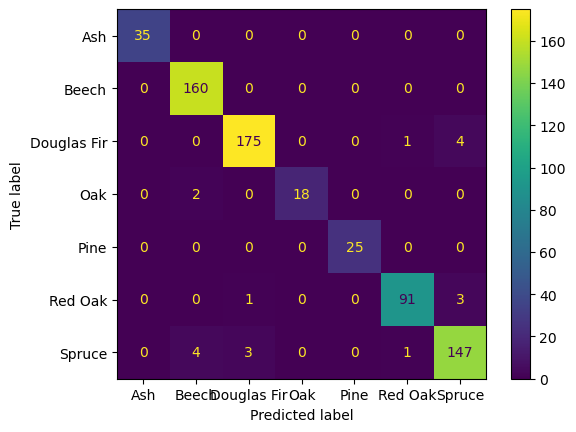

In [ ]:
# Visualize the results ( confusion matrix, etc.)
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()







In [34]:
#  Save the model 
import joblib

joblib.dump(model, configs.MODEL_DIR / 'svm_model.pkl')

['C:\\Users\\lenovo\\Desktop\\TDDP\\outputs\\models\\svm_model.pkl']